<a href="https://colab.research.google.com/github/FrancescoMonaco/MultiDimMotifDiscovery/blob/main/EvaluationSuite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%%capture
#@title Basics
!pip install numpy scikit-learn datasketch scipy
!pip install stumpy NearPy
%matplotlib inline
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from numba import cuda
from tqdm import tqdm
import multiprocessing as mp
import time
import sys
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
#@title Methods imports
%%capture
import requests
base_url = "raw.githubusercontent.com/FrancescoMonaco/MultiDimMotifDiscovery/main/source"
files_to_download = ["base.py", "find_bin_width.py", "stop.py", "RP_DC.py", "RP_MH.py"]
for file_name in files_to_download:
      file_url = f"{base_url}/{file_name}"
      !wget {file_url}


from RP_DC import *
from RP_MH import *

# Cutaneous potential Recordings 2500x8

In [ ]:
!wget https://ftp.esat.kuleuven.be/pub/SISTA/data/biomedical/foetal_ecg.dat.gz
!gzip -d /content/foetal_ecg.dat.gz

data = pd.read_csv("/content/foetal_ecg.dat", delim_whitespace= True)
data = data.drop(data.columns[[0]],axis=1)
data.shape
data = data.to_numpy()

--2024-05-03 11:38:30--  https://ftp.esat.kuleuven.be/pub/SISTA/data/biomedical/foetal_ecg.dat.gz
Resolving ftp.esat.kuleuven.be (ftp.esat.kuleuven.be)... 134.58.56.3, 2a02:2c40:0:a401::3
Connecting to ftp.esat.kuleuven.be (ftp.esat.kuleuven.be)|134.58.56.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50423 (49K) [application/x-gzip]
Saving to: ‘foetal_ecg.dat.gz’

foetal_ecg.dat.gz   100%[===================>]  49.24K   187KB/s    in 0.3s    

2024-05-03 11:38:31 (187 KB/s) - ‘foetal_ecg.dat.gz’ saved [50423/50423]



In [ ]:
#@title Exact finding
process_time = time.process_time()
matrix_profile, matrix_profile_idx = stumpy.mstump(data.T, m=45)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)

Elapsed time: 12.428072067999999


In [ ]:
#@title Approximate finding
# Set parameters
window_size = 45
lsh_threshold = 0.51
projection_iter = 13
k = 3
proj= 4
colors = ["red", "green", "blue", "pink", "cyan", "yellow", "orange", "gray", "purple"]

#cProfile.run("pmotif_find2(X_p, window_size, projection_iter, k, proj, 10,lsh_threshold, 10, 32)")
process_time = time.process_time()
motifs, distance_comp = pmotif_find2(data, window_size, projection_iter, k, proj, 10,lsh_threshold, 20, 8)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)
print(distance_comp)

Hashing finished


Iteration:   1%|          | 1/160 [00:01<04:50,  1.83s/it]

Stop: True 3
set exit


Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Elapsed time: 3.025356105
3270


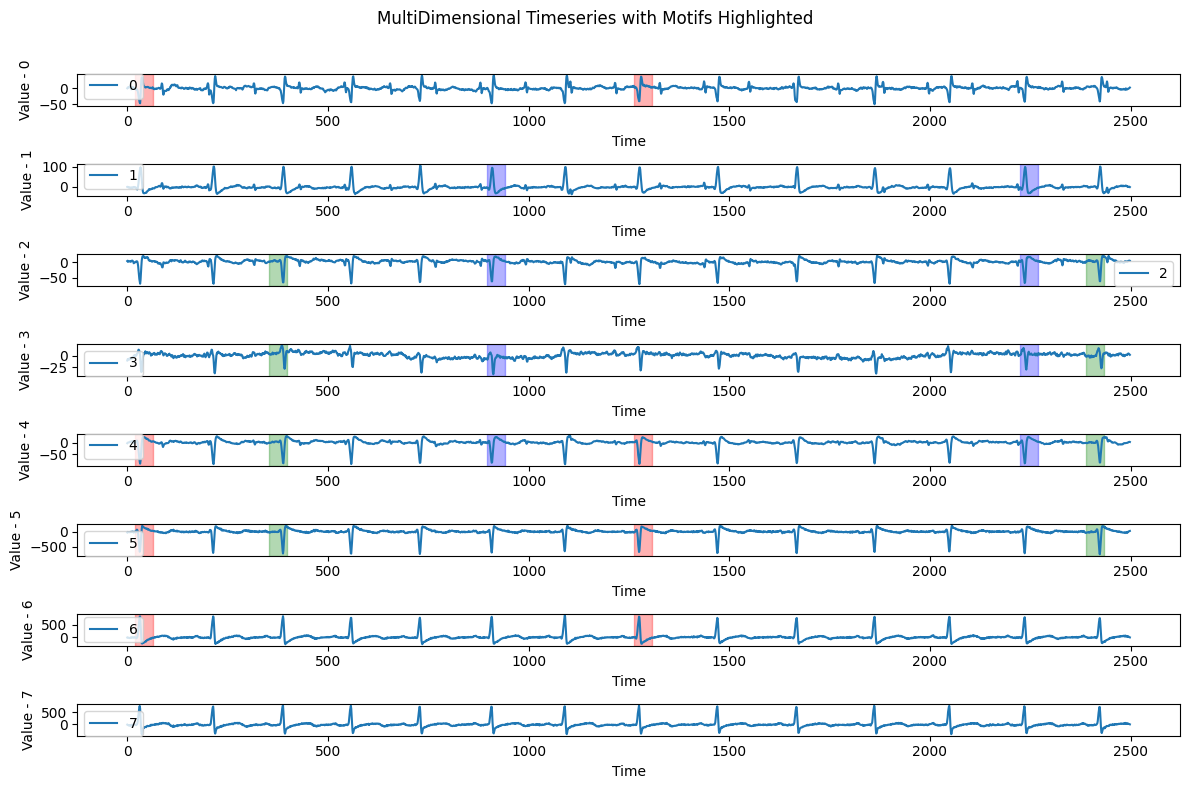

In [ ]:
#@title Plot the motifs
copy = motifs.queue
motifs = copy
#motifs = find_all_occur(extract, motifs, window_size)

fig, axs = plt.subplots(8, 1, figsize=(12, 8))
X = pd.DataFrame(data)
for i, dimension in enumerate(X.columns):
    axs[i].plot(X[dimension], label=dimension)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

    for idx, motif in enumerate(motifs):
        # Highlight the motifs in all dimensions
        for m in motif[1][1]:
          if i in motif[1][2][0]:
            axs[i].axvspan(m, m + window_size, color=colors[idx], alpha=0.3)

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Evaporator data 7000x5

In [ ]:
!wget https://ftp.esat.kuleuven.be/pub/SISTA/data/process_industry/evaporator.dat.gz
!gzip -d /content/evaporator.dat.gz

data = pd.read_csv("/content/evaporator.dat", delim_whitespace= True)
data = data.drop(data.columns[[0]],axis=1)
data.shape
data = data.to_numpy()

--2024-04-17 13:00:46--  https://ftp.esat.kuleuven.be/pub/SISTA/data/process_industry/evaporator.dat.gz
Resolving ftp.esat.kuleuven.be (ftp.esat.kuleuven.be)... 134.58.56.3, 2a02:2c40:0:a401::3
Connecting to ftp.esat.kuleuven.be (ftp.esat.kuleuven.be)|134.58.56.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113111 (110K) [application/x-gzip]
Saving to: ‘evaporator.dat.gz’

evaporator.dat.gz   100%[===================>] 110.46K   358KB/s    in 0.3s    

2024-04-17 13:00:47 (358 KB/s) - ‘evaporator.dat.gz’ saved [113111/113111]



In [ ]:
#@title Exact finding
process_time = time.process_time()
matrix_profile, matrix_profile_idx = stumpy.mstump(data.T, m=45)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)

Elapsed time: 20.055610216999998


In [ ]:
#@title Approximate finding
# Set parameters
window_size = 70
lsh_threshold = 0.51
projection_iter = 13
k = 3
proj= 2
colors = ["red", "green", "blue", "pink", "cyan", "yellow", "orange", "gray", "purple"]

#cProfile.run("pmotif_find2(X_p, window_size, projection_iter, k, proj, 10,lsh_threshold, 10, 32)")
process_time = time.process_time()
motifs, distance_comp = pmotif_find2(data, window_size, projection_iter, k, proj, 10,lsh_threshold, 20, 8)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)
print(distance_comp)

Hashing finished


Iteration:   1%|▏         | 2/160 [00:05<06:46,  2.57s/it]

Stop: True 1
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit


Stop: True 3
set exit
Stop: True 3
set exit
Elapsed time: 7.91673535100017
80


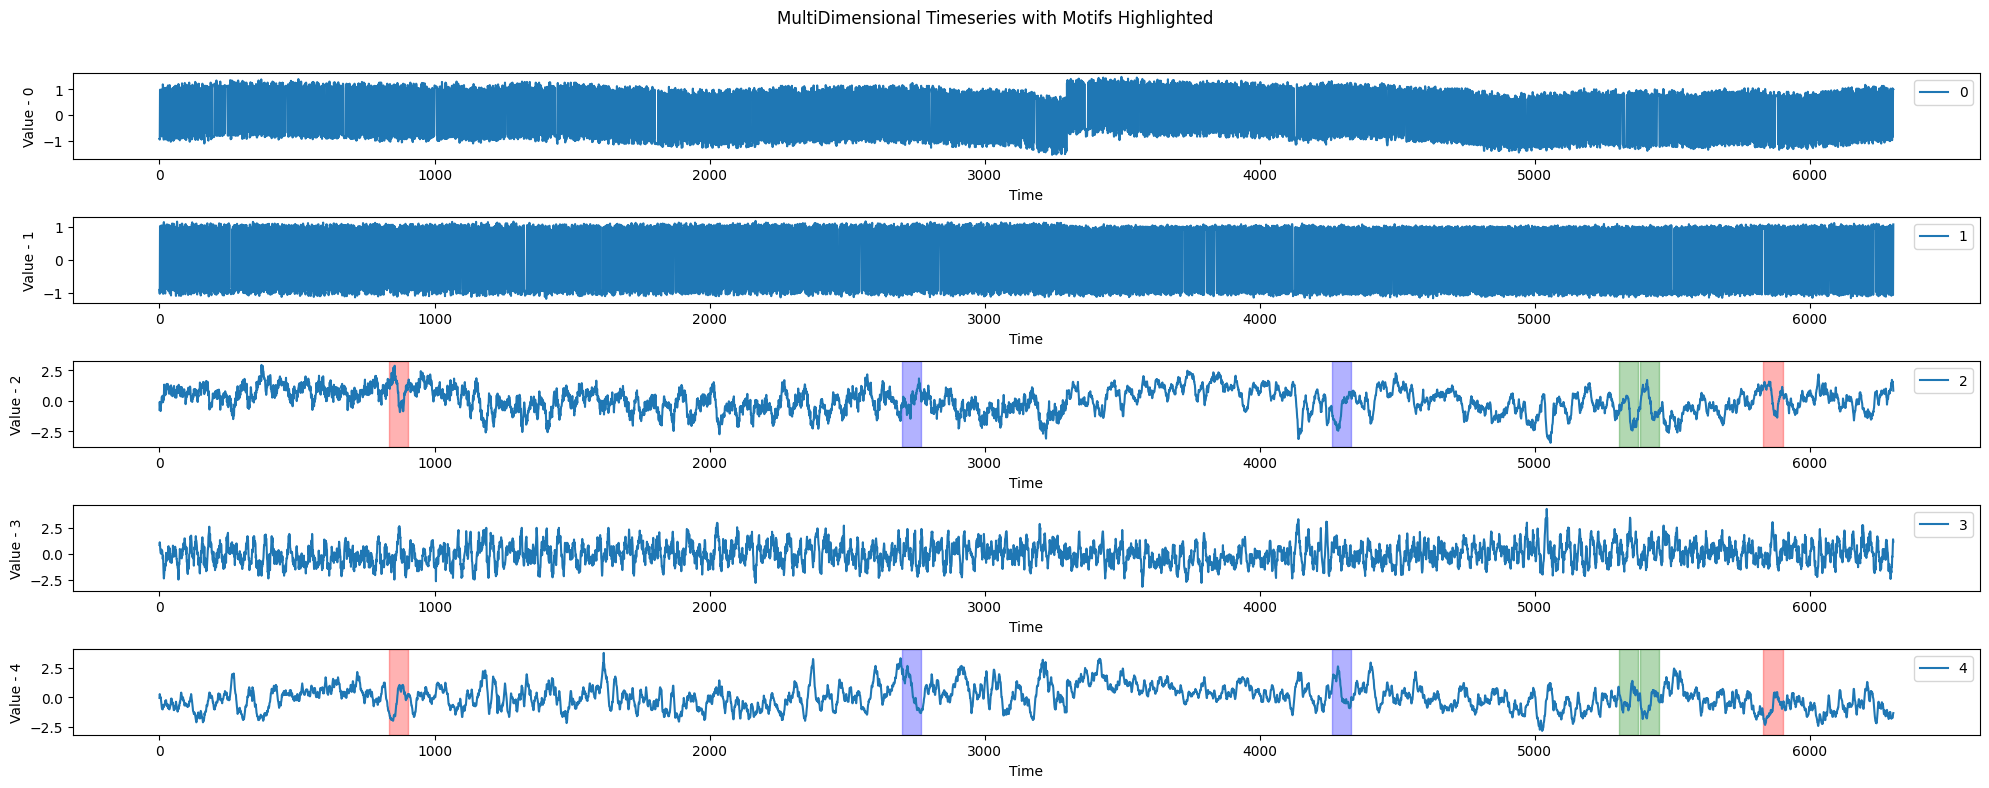

In [ ]:
#@title Plot the motifs
#copy = motifs.queue
motifs = copy
#motifs = find_all_occur(extract, motifs, window_size)

fig, axs = plt.subplots(5, 1, figsize=(20, 8))
X = pd.DataFrame(data)
for i, dimension in enumerate(X.columns):
    axs[i].plot(X[dimension], label=dimension)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

    for idx, motif in enumerate(motifs):
        # Highlight the motifs in all dimensions
        for m in motif[1][1]:
          if i in motif[1][2][0]:
            axs[i].axvspan(m, m + window_size, color=colors[idx], alpha=0.3)

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Motion Data 1000x51

In [ ]:
#@title Load data
!wget https://mcgovern-fagg.org/idea_html/theses/drosendahl/cmuMocap16.mat

from scipy.io import loadmat
mat = loadmat("/content/cmuMocap16.mat")
data = mat['data']

extract = data[0,5][3]
extract2 = data[0,6][3]
extract = extract.T
extract = np.concatenate([extract, extract2.T])
extract = np.delete(extract, [2, 33, 45], axis=1)

--2024-04-16 09:04:26--  https://mcgovern-fagg.org/idea_html/theses/drosendahl/cmuMocap16.mat
Resolving mcgovern-fagg.org (mcgovern-fagg.org)... 173.236.140.183
Connecting to mcgovern-fagg.org (mcgovern-fagg.org)|173.236.140.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14230704 (14M)
Saving to: ‘cmuMocap16.mat.1’

cmuMocap16.mat.1    100%[===================>]  13.57M  16.8MB/s    in 0.8s    

2024-04-16 09:04:27 (16.8 MB/s) - ‘cmuMocap16.mat.1’ saved [14230704/14230704]



In [ ]:
#@title Exact finding
process_time = time.process_time()
matrix_profile, matrix_profile_idx = stumpy.mstump(extract, m=45)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)

Elapsed time: 11.942704231999999


In [ ]:
#@title Plot the motifs
motifs_idx = np.argmin(matrix_profile, axis=1)
X = pd.DataFrame(extract)
nn_idx = matrix_profile_idx[np.arange(len(motifs_idx)), motifs_idx]
m = 30
fig, axs = plt.subplots(matrix_profile.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 1.8}, figsize=(60,40))

for k, dim_name in enumerate(X.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(X[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')


    axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')

    #if dim_name != 'T3':
    axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), X[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
    axs[k].plot(range(nn_idx[k], nn_idx[k] + m), X[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)


plt.show()

In [ ]:
#@title Approximate finding
# Set parameters
window_size = 45
lsh_threshold = 0.51
projection_iter = 13
k = 3
proj= 2
colors = ["red", "green", "blue", "pink", "cyan", "yellow", "orange", "gray", "purple"]

#cProfile.run("pmotif_find2(X_p, window_size, projection_iter, k, proj, 10,lsh_threshold, 10, 32)")
process_time = time.process_time()
motifs, distance_comp = pmotif_find2(extract, window_size, projection_iter, k, proj, 10,lsh_threshold, 20, 16)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)
print(distance_comp)

Hashing finished


Iteration:   1%|          | 2/320 [00:02<05:37,  1.06s/it]

Stop: True 2
Stop: True 3
set exit
Stop: True 3
set exit


Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Stop: True 3
set exit
Elapsed time: 4.205589997000061
379


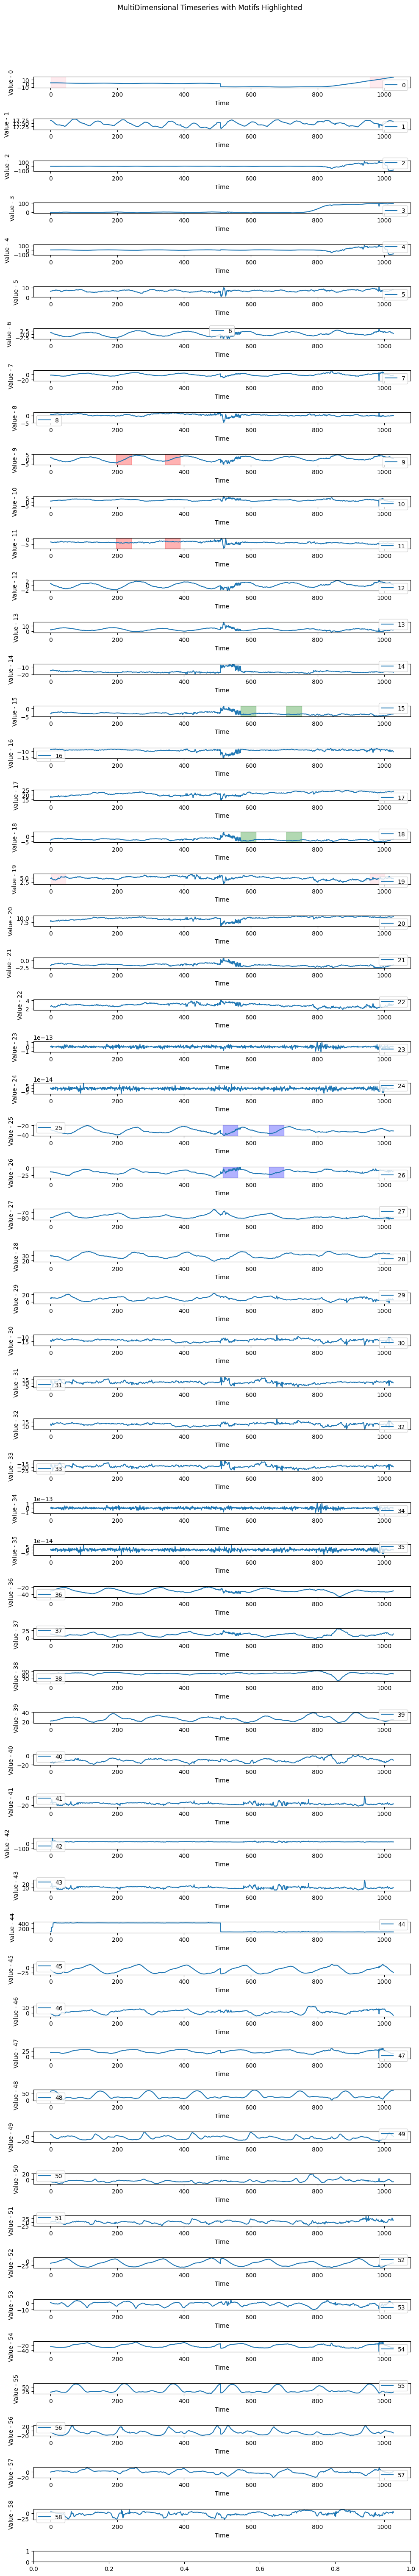

In [ ]:
#@title Plot the motifs
copy = motifs.queue
motifs = copy
#motifs = find_all_occur(extract, motifs, window_size)

fig, axs = plt.subplots(60, 1, figsize=(10, 62))
X = pd.DataFrame(extract)
for i, dimension in enumerate(X.columns):
    axs[i].plot(X[dimension], label=dimension)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

    for idx, motif in enumerate(motifs):
        # Highlight the motifs in all dimensions
        for m in motif[1][1]:
          if i in motif[1][2][0]:
            axs[i].axvspan(m, m + window_size, color=colors[idx], alpha=0.3)

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
#@title Relative contrast
print(relative_contrast(extract, motifs[0][1][1], window_size))

#Music

In [ ]:
!pip install librosa
import librosa
from librosa.feature import melspectrogram

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

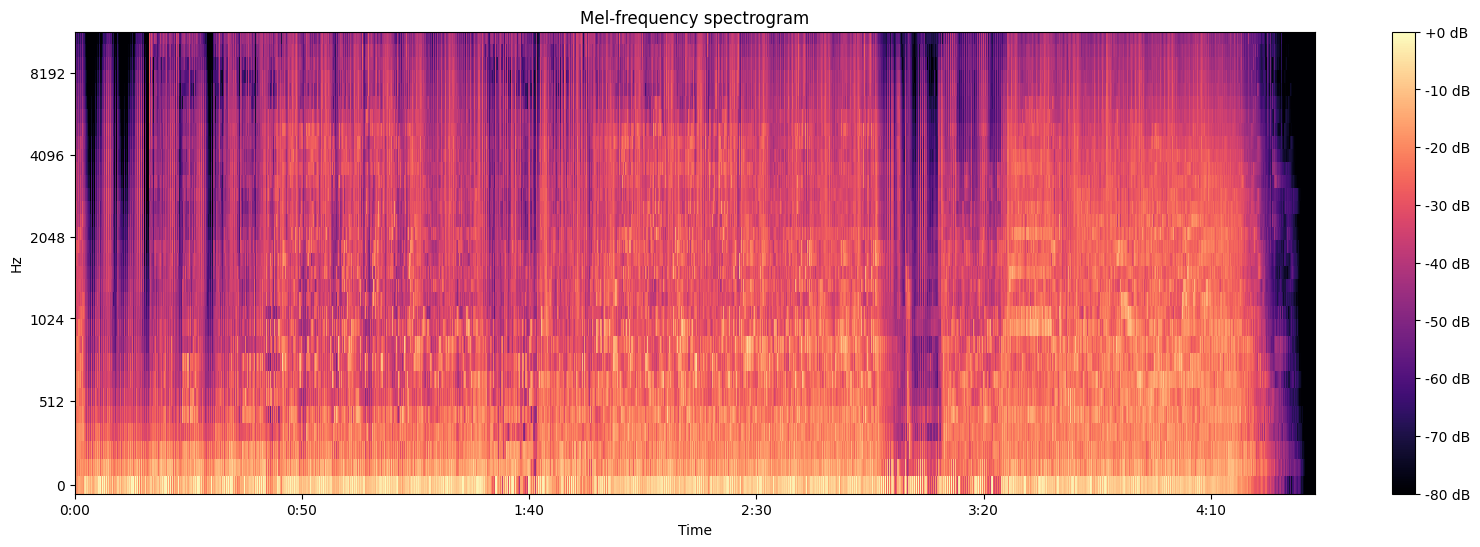

In [9]:
filename = "/content/Black_Eye (1).mp3"
y, sr = librosa.load(filename)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=32)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [11]:
data = S.T

In [10]:
#@title Exact finding
process_time = time.process_time()
matrix_profile, matrix_profile_idx = stumpy.mstump(S.astype(np.float64), m=200)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)

Elapsed time: 228.84420647899998


In [ ]:
#@title Approximate finding
# Set parameters
window_size = 300
lsh_threshold = 0.51
projection_iter = 13
k = 2
proj= 2
colors = ["red", "green", "blue", "pink", "cyan", "yellow", "orange", "gray", "purple"]

#cProfile.run("pmotif_find2(X_p, window_size, projection_iter, k, proj, 10,lsh_threshold, 10, 32)")
process_time = time.process_time()
motifs, distance_comp = pmotif_find2(data, window_size, projection_iter, k, proj, 20,lsh_threshold, 10, 8)
elapsed_time = time.process_time() - process_time

print("Elapsed time:", elapsed_time)
print(distance_comp)

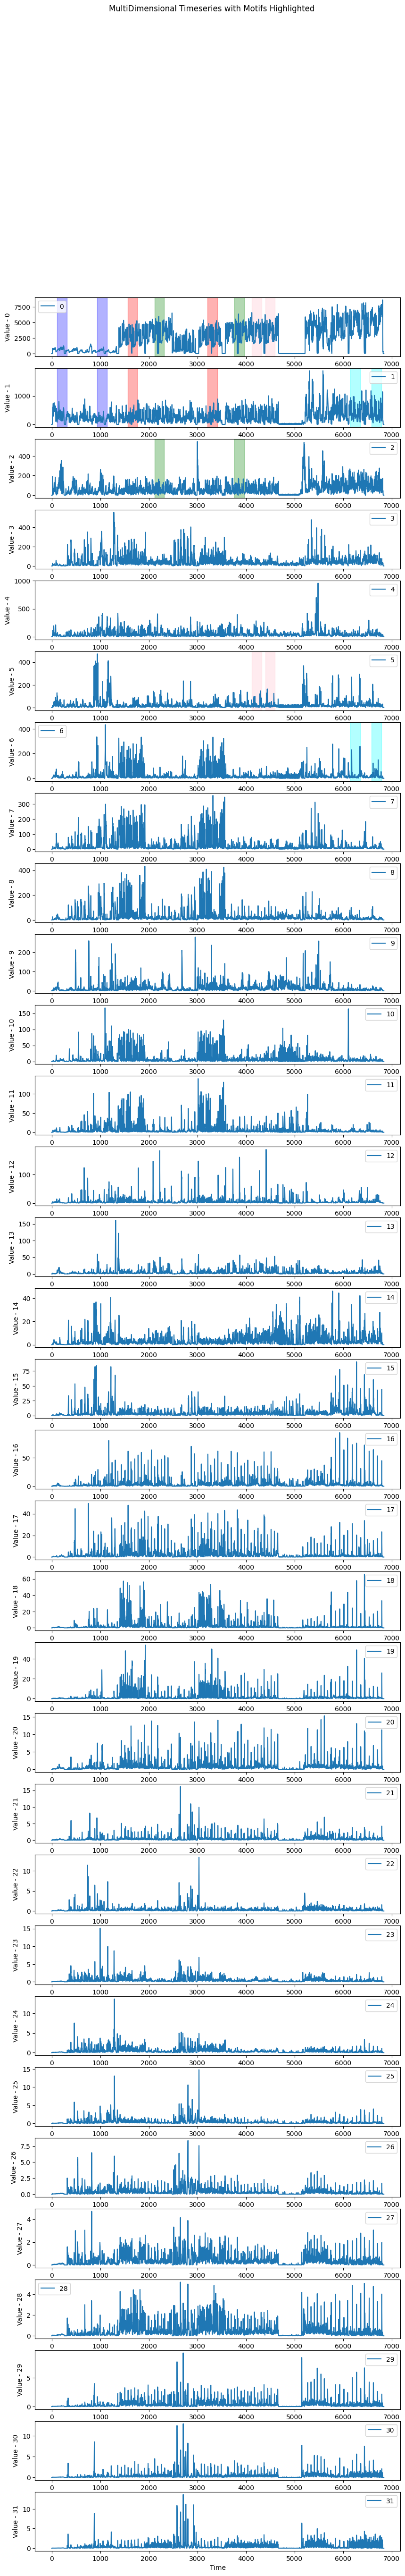

In [ ]:
#@title Plot the motifs
copy = motifs.queue
motifs = copy
#motifs = find_all_occur(extract, motifs, window_size)

fig, axs = plt.subplots(32, 1, figsize=(10, 62))
X = pd.DataFrame(data)
for i, dimension in enumerate(X.columns):
    axs[i].plot(X[dimension], label=dimension)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

    for idx, motif in enumerate(motifs):
        # Highlight the motifs in all dimensions
        for m in motif[1][1]:
          if i in motif[1][2][0]:
            axs[i].axvspan(m, m + window_size, color=colors[idx], alpha=0.3)

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.show()

#Electrical Load 21 houses 1 year

In [ ]:
#@title Download and extract data
!wget https://pureportal.strath.ac.uk/files/62090184/CLEAN_REFIT_081116.7z
!7z x /content/CLEAN_REFIT_081116.7z

#Weather Australia x8

In [ ]:
#title Download and load data
!wget https://zenodo.org/records/5184708/files/oikolab_weather_dataset.zip?download=1
!unzip /content/oikolab_weather_dataset.zip